Three missionaries and three cannibals are on the west bank of a river. They have a canoe that can hold two people, and they all must cross to the east bank of the river. There may never be more cannibals than missionaries on either side of the river, or the cannibals will eat the missionaries. Further, the canoe must have at least one person on board to cross the river. 

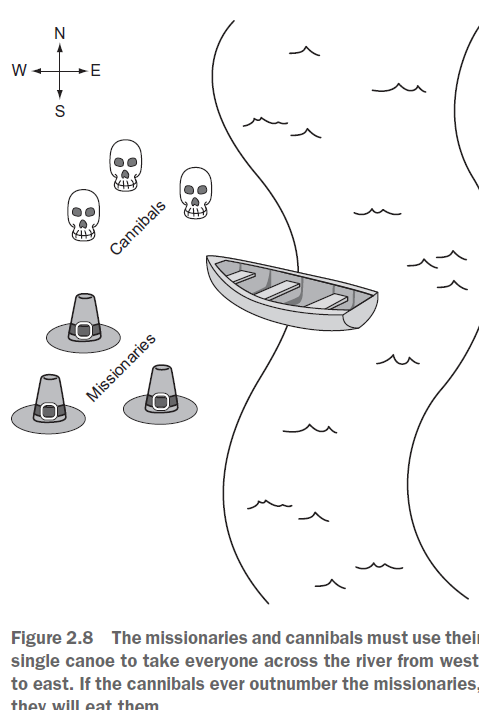

**What sequence of crossings will successfully take the entire party across the river?**

### Representing the problem.

We will represent the problem by having a structure that keeps track of the west bank. Once we have this knowledge we can figure out what is on the east bank. 

First, we will create a little convenience variable for keeping track of the maximum number of missionaries or cannibals. Then we will define the main class.

In [12]:
from __future__ import annotations
from typing import List, Optional
from generic_search import bfs, Node, node_to_path

MAX_NUM: int = 3

class MCState:
    def __init__(self, missionaries: int, cannibals: int, boat: bool) -> None:
        self.wm: int = missionaries # west bank missionaries
        self.wc: int = cannibals # west bank cannibals
        self.em: int = MAX_NUM - self.wm  # east bank missionaries
        self.ec: int = MAX_NUM - self.wc  # east bank cannibals
        self.boat: bool = boat

    def __str__(self) -> str:
        return ("On the west bank there are {} missionaries and {} cannibals.\n" 
                "On the east bank there are {} missionaries and {} cannibals.\n"
                "The boat is on the {} bank.")\
            .format(self.wm, self.wc, self.em, self.ec, ("west" if self.boat else "east"))
    
    def goal_test(self) -> bool:
        return self.is_legal and self.em == MAX_NUM and self.ec == MAX_NUM
    
    def is_legal(self) -> bool:
        if self.wm < self.wc and self.wm > 0:
            return False
        if self.em < self.ec and self.em > 0:
            return False
        return True
    
    def successors(self) -> List[MCState]:
        sucs: List[MCState] = []
        if self.boat: # boat on west bank
            if self.wm > 1:
                sucs.append(MCState(self.wm - 2, self.wc, not self.boat))
            if self.wm > 0:
                sucs.append(MCState(self.wm - 1, self.wc, not self.boat))
            if self.wc > 1:
                sucs.append(MCState(self.wm, self.wc - 2, not self.boat))
            if self.wc > 0:
                sucs.append(MCState(self.wm, self.wc - 1, not self.boat))
            if (self.wc > 0) and (self.wm > 0):
                sucs.append(MCState(self.wm - 1, self.wc - 1, not self.boat))
        else: # boat on east bank
            if self.em > 1:
                sucs.append(MCState(self.wm + 2, self.wc, not self.boat))
            if self.em > 0:
                sucs.append(MCState(self.wm + 1, self.wc, not self.boat))
            if self.ec > 1:
                sucs.append(MCState(self.wm, self.wc + 2, not self.boat))
            if self.ec > 0:
                sucs.append(MCState(self.wm, self.wc + 1, not self.boat))
            if (self.ec > 0) and (self.em > 0):
                sucs.append(MCState(self.wm + 1, self.wc + 1, not self.boat))
                
        return [x for x in sucs if x.is_legal]


The class `MCState` initializes itself based on the number of missionaries and cannibals on the west bank as well as the location of the boat. It also knows how to pretty-print itself, which will be as valuable later when displaying the solution to the problem. 

**Goal test**

We also need a goal test function. The goal is simply when we reach a legal state that has all of the missionaries and cannibals on the east bank. We add it as method to `MCState`.

```
    def goal_test(self) -> bool:
        return self.is_legal and self.em == MAX_NUM and self.ec == MAX_NUM
```

**Successors**

To create a successors function, it is necessary to go through all of the possible moves that can be made from one bank to another and then check if each of those moves will result in a legal state. 

A legal state is one in which cannibals do not outnumber missionaries on either bank. To determine this, we can define a convenience property that checks if a state is legal.

```
    def is_legal(self) -> bool:
        if self.wm < self.wc and self.wm > 0:
            return False
        if self.em < self.ec and self.em > 0:
            return False
        return True
```


The actual successors function tries to adding every possible combination of one or two people moving across the river from the bank where the canoe currently resides. Once it has added all possible moves, it filters for the ones that are actually legal via a list comprehension. 



## Solving

We now have all of the ingredients in place to solve the problem. When we solve a problem using the search functions `bfs()`, `dfs()` and `astar()`, we get back a `Node` that ultimately we convert using `node_to_path()` into a list of states that leads to a solution. 

What we still need is a way to convert that list into a comprehensible printed sequence of steps to solve the missionaries and cannibals problem.


The function `display_solution()` converts a solution path into printed output. It works by iterating through all of the states in the solution path while keeping track of the last state as well. It looks at the difference between the last state and the state it is currently iterating on to find out how many missionaries and cannibals moved across the river and in which direction.

In [13]:
def display_solution(path: List[MCState]):
    if len(path) == 0: # sanity check
        return
    old_state: MCState = path[0]
    print(old_state)
    for current_state in path[1:]:
        if current_state.boat:
            print("{} missionaries and {} cannibals moved from the east bank to the west bank.\n"
                  .format(old_state.em - current_state.em, old_state.ec - current_state.ec))
        else:
            print("{} missionaries and {} cannibals moved from the west bank to the east bank.\n"
                  .format(old_state.wm - current_state.wm, old_state.wc - current_state.wc))
        print(current_state)
        old_state = current_state

This function takes advantage of the pretty print function in `MCState`.

The last thing we need to do is actually solve the missionaires and cannibals problem. To do so we can conveniently reuse a search function that we have already implemented, because we implemented them generically. 

This solution uses `bfs()` (because using `dfs()` would require marking referentially different states with the same value as equal, and `astar()` would require a heuristic).

In [14]:
if __name__ == "__main__":
    
    start: MCState = MCState(MAX_NUM, MAX_NUM, True)
        
    solution: Optional[Node[MCState]] = bfs(start, MCState.goal_test, MCState.successors)
    if solution is None:
        print("No solution found!")
    else:
        path: List[MCState] = node_to_path(solution)
        display_solution(path)

On the west bank there are 3 missionaries and 3 cannibals.
On the east bank there are 0 missionaries and 0 cannibals.
The boat is on the west bank.
2 missionaries and 0 cannibals moved from the west bank to the east bank.

On the west bank there are 1 missionaries and 3 cannibals.
On the east bank there are 2 missionaries and 0 cannibals.
The boat is on the east bank.
1 missionaries and 0 cannibals moved from the east bank to the west bank.

On the west bank there are 2 missionaries and 3 cannibals.
On the east bank there are 1 missionaries and 0 cannibals.
The boat is on the west bank.
2 missionaries and 0 cannibals moved from the west bank to the east bank.

On the west bank there are 0 missionaries and 3 cannibals.
On the east bank there are 3 missionaries and 0 cannibals.
The boat is on the east bank.
1 missionaries and 0 cannibals moved from the east bank to the west bank.

On the west bank there are 1 missionaries and 3 cannibals.
On the east bank there are 2 missionaries and 0 c

It is great to see how flexible our generic search functions can be. 